In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.linear_model import LinearRegression

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [3]:
versicolor_df = iris_df[iris_df['species'] == 'versicolor']
versicolor_df.index = range(0,50)

In [4]:
versicolor_df_x=pd.DataFrame(versicolor_df["sepal length (cm)"])
versicolor_df_y=versicolor_df["sepal width (cm)"]

In [5]:
md = LinearRegression().fit(versicolor_df_x, versicolor_df_y)
print('coefficient of determination::', md.score(versicolor_df_x, versicolor_df_y))
print('intercept:', md.intercept_) 
print('slope:', md.coef_)

coefficient of determination:: 0.27658208255293537
intercept: 0.8721459648262753
slope: [0.31971935]


 
0.3197 x + 0.8721
         2
-0.1183 x + 1.731 x - 3.303
       3         2
0.298 x - 5.415 x + 32.92 x - 64.16
        4         3         2
0.1312 x - 2.823 x + 22.31 x - 76.06 x + 95.72


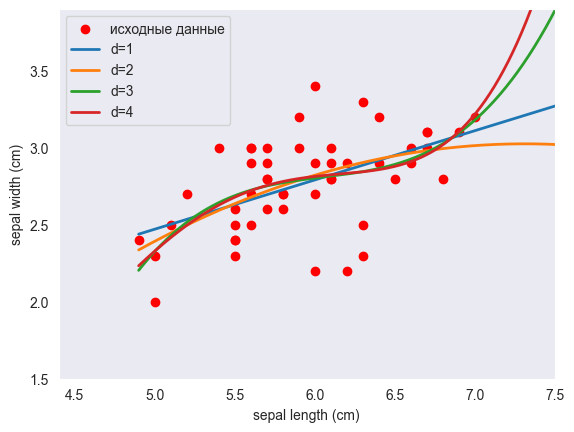

In [6]:
axes=plt.axes()
axes.set_xlim([versicolor_df_x['sepal length (cm)'].min()-0.5,versicolor_df_x['sepal length (cm)'].max()+0.5])
axes.set_ylim([versicolor_df_y.min()-0.5,versicolor_df_y.max()+0.5])
axes.set_xlabel('sepal length (cm)')
axes.set_ylabel('sepal width (cm)')
fx = np.linspace(versicolor_df_x['sepal length (cm)'].min(),versicolor_df_x['sepal length (cm)'].max()+5,1000)
legend = []
plt.scatter(versicolor_df_x['sepal length (cm)'],versicolor_df_y,color='red', marker='o')
legend.append("исходные данные")
# хватит и четырех графиков для того, чтобы понять, что регрессия действительно линейная и коэф перед младшей и старшей степенью отличаются на несколько порядков
for d in range(1, 5):
    fp = np.polyfit(versicolor_df_x['sepal length (cm)'], versicolor_df_y, d)
    f = sp.poly1d(fp)
    print(f)
    plt.plot(fx, f(fx), linewidth=2)
    legend. append ("d=%i" % f.order)
plt.legend (legend, loc="upper left")
plt.grid()
plt.show()